## importing important libraries

In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




## importing data

In [2]:


data=pd.read_csv("C:/Users/PC-LENOVO/Documents/Machine Learning/new sir/ass1_knnregressor.csv")
data.head()



,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [3]:
data.tail(5)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


## checking for null values

In [4]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [5]:
data.keys()

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

### Data Visualization

<AxesSubplot:>

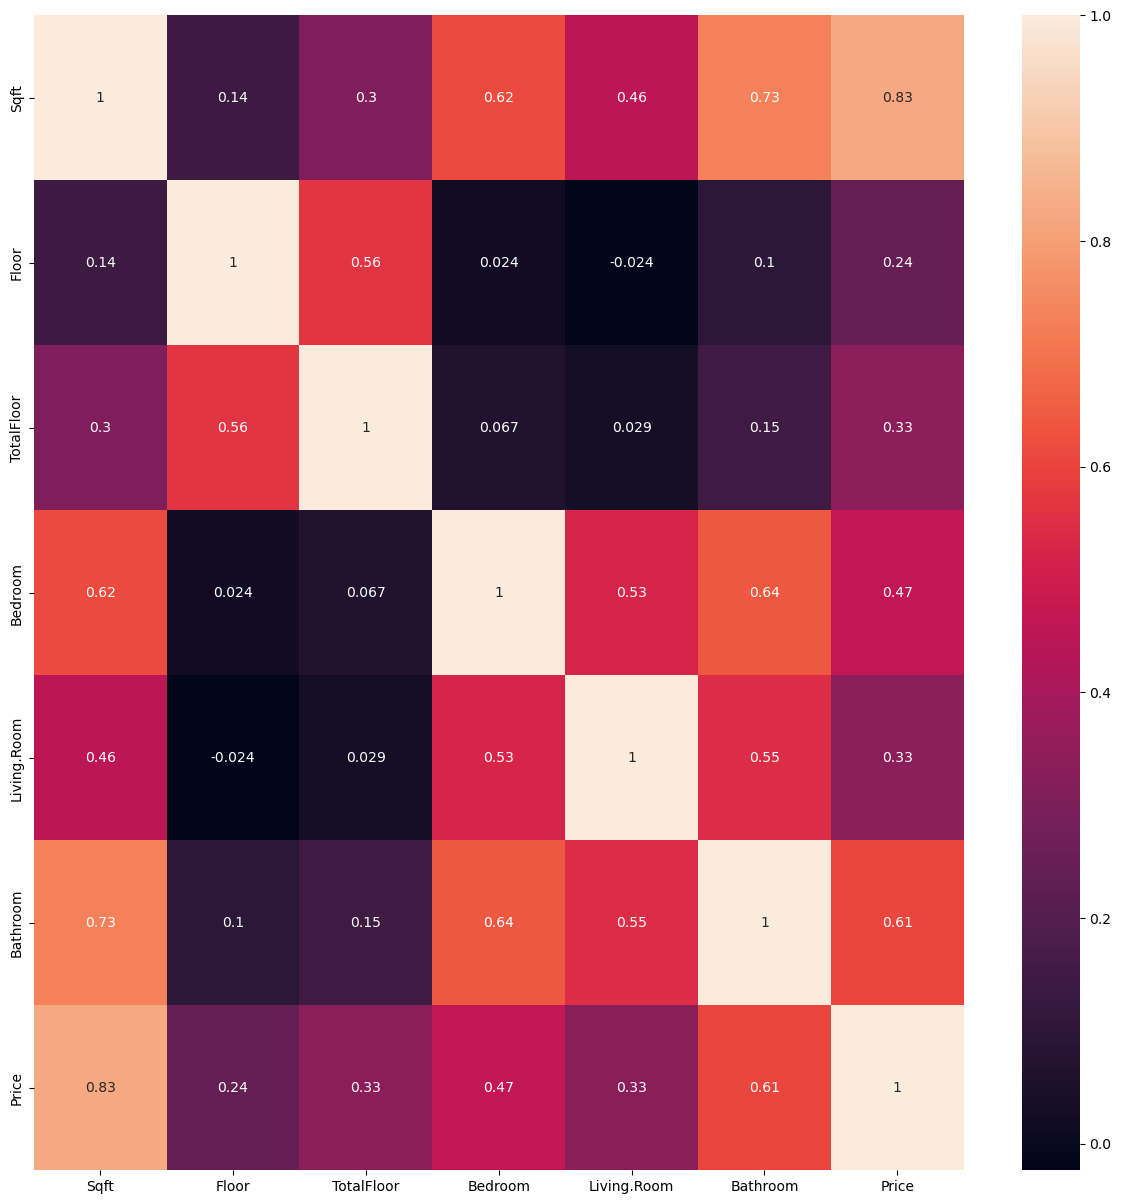

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot = True)

#### The price of house majorly depends on ---
#### 1. Bathroom and Sqft

## Splittng data into X and Y

In [7]:
# X

X=data.drop('Price', axis=1)
X


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2
...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1
643,1707.840,3,14,3,2,2


In [8]:
# Creating TargetVariable

y=data[['Price']]
y

,Price
0,62000
1,78000
2,58000
3,45000
4,45000
...,...
640,45000
641,24800
642,45000
643,65000


## Performing train test split.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

### Applying Linear Regression on dataset

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [11]:
lr.fit(X_train, y_train)


LinearRegression()

## Prediction

In [12]:
y_pred = lr.predict(X_test)


## Comparison between prediction and test set data

In [13]:
y_test = y_test.values
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[106797.20772    100000.        ]
 [ 33490.92684639  28000.        ]
 [ 80726.70630979  55000.        ]
 [ 84840.52720736  43000.        ]
 [ 32866.57178373  25000.        ]
 [109163.36758545 138888.        ]
 [120793.3681571  160000.        ]
 [ 65606.95804995  51999.        ]
 [ 57010.02601828  36000.        ]
 [ 41746.23633369  41999.        ]
 [ 51043.0035131   40000.        ]
 [ 37977.52197263  36000.        ]
 [ 20984.59390132  27500.        ]
 [ 54190.74027275  50000.        ]
 [ 47254.95071456  35000.        ]
 [ 81056.68189163 108000.        ]
 [ 37080.80682596  58500.        ]
 [ 45380.60961845  45000.        ]
 [ 62989.50119041  75000.        ]
 [ 50693.67607909  45000.        ]
 [ 24666.04790535  32500.        ]
 [169205.26852575 180000.        ]
 [ 77830.85629643  77999.        ]
 [ 91898.50831667  69500.        ]
 [ 66162.32994539  75000.        ]
 [ 81682.13905061 100000.        ]
 [ 75343.37068612  69000.        ]
 [ 64777.02171849  45000.        ]
 [ 74491.98695882  8

## Evaluation Metrics 

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer,mean_absolute_error

In [15]:
mse=mean_squared_error(y_test,y_pred, squared=True)
mse

440685533.960514

In [16]:
rmse = np.sqrt(mse)
rmse

20992.51137812039

In [17]:
R2score = r2_score( y_test, y_pred)
print('R2score', R2score)



R2score 0.6523894789774942


#### this shows us that the model's accuracy is 65.23%

In [18]:
lr.intercept_

array([1410.85438307])

In [19]:
lr.coef_

array([[   38.77152229,  1259.89900708,   113.97345469, -2438.99407258,
        -2059.3779507 ,  1800.40392999]])

#### As it depends mainly on sqft and bathroom so condering both to create equation

In [ ]:
price_of_house= 1410 +38.77*(Sqft) + 1800*(Bathroom)